In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [35]:
df = pd.read_csv('ks-projects-201801.csv')
df = df[df.state != 'undefined']

In [36]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375099 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                375099 non-null  int64  
 1   name              375095 non-null  object 
 2   category          375099 non-null  object 
 3   main_category     375099 non-null  object 
 4   currency          375099 non-null  object 
 5   deadline          375099 non-null  object 
 6   goal              375099 non-null  float64
 7   launched          375099 non-null  object 
 8   pledged           375099 non-null  float64
 9   state             375099 non-null  object 
 10  backers           375099 non-null  int64  
 11  country           375099 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  375099 non-null  float64
 14  usd_goal_real     375099 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [38]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.750990e+05,3.750990e+05,3.750990e+05,375099.000000,3.748640e+05,3.750990e+05,3.750990e+05
mean,1.074632e+09,4.950504e+04,9.753282e+03,106.620436,7.036729e+03,9.123935e+03,4.584708e+04
std,6.191294e+08,1.188989e+06,9.608575e+04,911.423593,7.863975e+04,9.140142e+04,1.158404e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380782e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075217e+09,5.500000e+03,6.200000e+02,12.000000,3.947200e+02,6.250000e+02,5.500000e+03
75%,1.610128e+09,1.650000e+04,4.080000e+03,57.000000,3.034090e+03,4.050180e+03,1.600000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [39]:
grouped = df.groupby('category')
sub_df = {}

for group_name, group_data in grouped:
    sub_df[group_name] = group_data.copy()
    


In [55]:
grouped_by_category = df_success.groupby('category')

success_count = grouped_by_category.size()

total_count = df['category'].value_counts()

success_rate = (success_count / total_count) * 100

overall_success_rate = (len(df_success) / len(df)) * 100

print("Individual Success Rates:")
print(success_rate)

print("\nOverall Success Rate:")
print(overall_success_rate)

Individual Success Rates:
category
3D Printing    35.483871
Academic       20.524017
Accessories    33.934219
Action         14.459459
Animals        24.705882
                 ...    
Woodworking    25.021422
Workshops      30.487805
World Music    43.862988
Young Adult    20.950061
Zines          45.780051
Length: 159, dtype: float64

Overall Success Rate:
35.712171986595536


In [57]:
better_than_overall = success_rate[success_rate > overall_success_rate]

print("Categories with Success Rate Better than Overall Success Rate:")
print(better_than_overall)

Categories with Success Rate Better than Overall Success Rate:
category
Anthologies    66.454082
Art            41.015388
Art Books      50.672646
Blues          43.656716
Calendars      38.905775
                 ...    
Theater        62.429138
Typography     58.333333
Webcomics      55.246914
World Music    43.862988
Zines          45.780051
Length: 65, dtype: float64


In [58]:
worse_than_overall = success_rate[success_rate <= overall_success_rate]

print("Categories with Success Rate Worse than Overall Success Rate:")
print(worse_than_overall)

Categories with Success Rate Worse than Overall Success Rate:
category
3D Printing    35.483871
Academic       20.524017
Accessories    33.934219
Action         14.459459
Animals        24.705882
                 ...    
Web             8.596934
Webseries      29.468934
Woodworking    25.021422
Workshops      30.487805
Young Adult    20.950061
Length: 94, dtype: float64


In [61]:
better_categories_list = better_than_overall.index.tolist()
better_categories_list

['Anthologies',
 'Art',
 'Art Books',
 'Blues',
 'Calendars',
 'Camera Equipment',
 'Ceramics',
 'Chiptune',
 'Civic Design',
 'Classical Music',
 'Comedy',
 'Comic Books',
 'Comics',
 'Country & Folk',
 'DIY Electronics',
 'Dance',
 'Documentary',
 'Drama',
 'Experimental',
 'Faith',
 'Festivals',
 'Fine Art',
 'Graphic Design',
 'Graphic Novels',
 'Illustration',
 'Immersive',
 'Indie Rock',
 'Installations',
 'Jazz',
 'Kids',
 'Knitting',
 'Letterpress',
 'Literary Journals',
 'Literary Spaces',
 'Metal',
 'Music',
 'Musical',
 'Narrative Film',
 'Performance Art',
 'Performances',
 'Periodicals',
 'Photobooks',
 'Playing Cards',
 'Plays',
 'Pop',
 'Pottery',
 'Public Art',
 'Punk',
 'Puzzles',
 'Radio & Podcasts',
 'Residencies',
 'Robots',
 'Rock',
 'Science Fiction',
 'Sculpture',
 'Shorts',
 'Sound',
 'Space Exploration',
 'Tabletop Games',
 'Taxidermy',
 'Theater',
 'Typography',
 'Webcomics',
 'World Music',
 'Zines']

In [62]:
worse_categories_list = worse_than_overall.index.tolist()
worse_categories_list

['3D Printing',
 'Academic',
 'Accessories',
 'Action',
 'Animals',
 'Animation',
 'Apparel',
 'Apps',
 'Architecture',
 'Audio',
 'Bacon',
 'Candles',
 "Children's Books",
 'Childrenswear',
 'Community Gardens',
 'Conceptual Art',
 'Cookbooks',
 'Couture',
 'Crafts',
 'Crochet',
 'DIY',
 'Design',
 'Digital Art',
 'Drinks',
 'Electronic Music',
 'Embroidery',
 'Events',
 'Fabrication Tools',
 'Family',
 'Fantasy',
 "Farmer's Markets",
 'Farms',
 'Fashion',
 'Fiction',
 'Film & Video',
 'Flight',
 'Food',
 'Food Trucks',
 'Footwear',
 'Gadgets',
 'Games',
 'Gaming Hardware',
 'Glass',
 'Hardware',
 'Hip-Hop',
 'Horror',
 'Interactive Design',
 'Jewelry',
 'Journalism',
 'Latin',
 'Live Games',
 'Makerspaces',
 'Mixed Media',
 'Mobile Games',
 'Movie Theaters',
 'Music Videos',
 'Nature',
 'Nonfiction',
 'Painting',
 'People',
 'Pet Fashion',
 'Photo',
 'Photography',
 'Places',
 'Poetry',
 'Print',
 'Printing',
 'Product Design',
 'Publishing',
 'Quilts',
 'R&B',
 'Ready-to-wear',
 'Re

/var/folders/rz/f2_f82c126g8zmvfyx378y0h0000gn/T/ipykernel_5469/3347955499.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(success_rate.index, rotation=0)


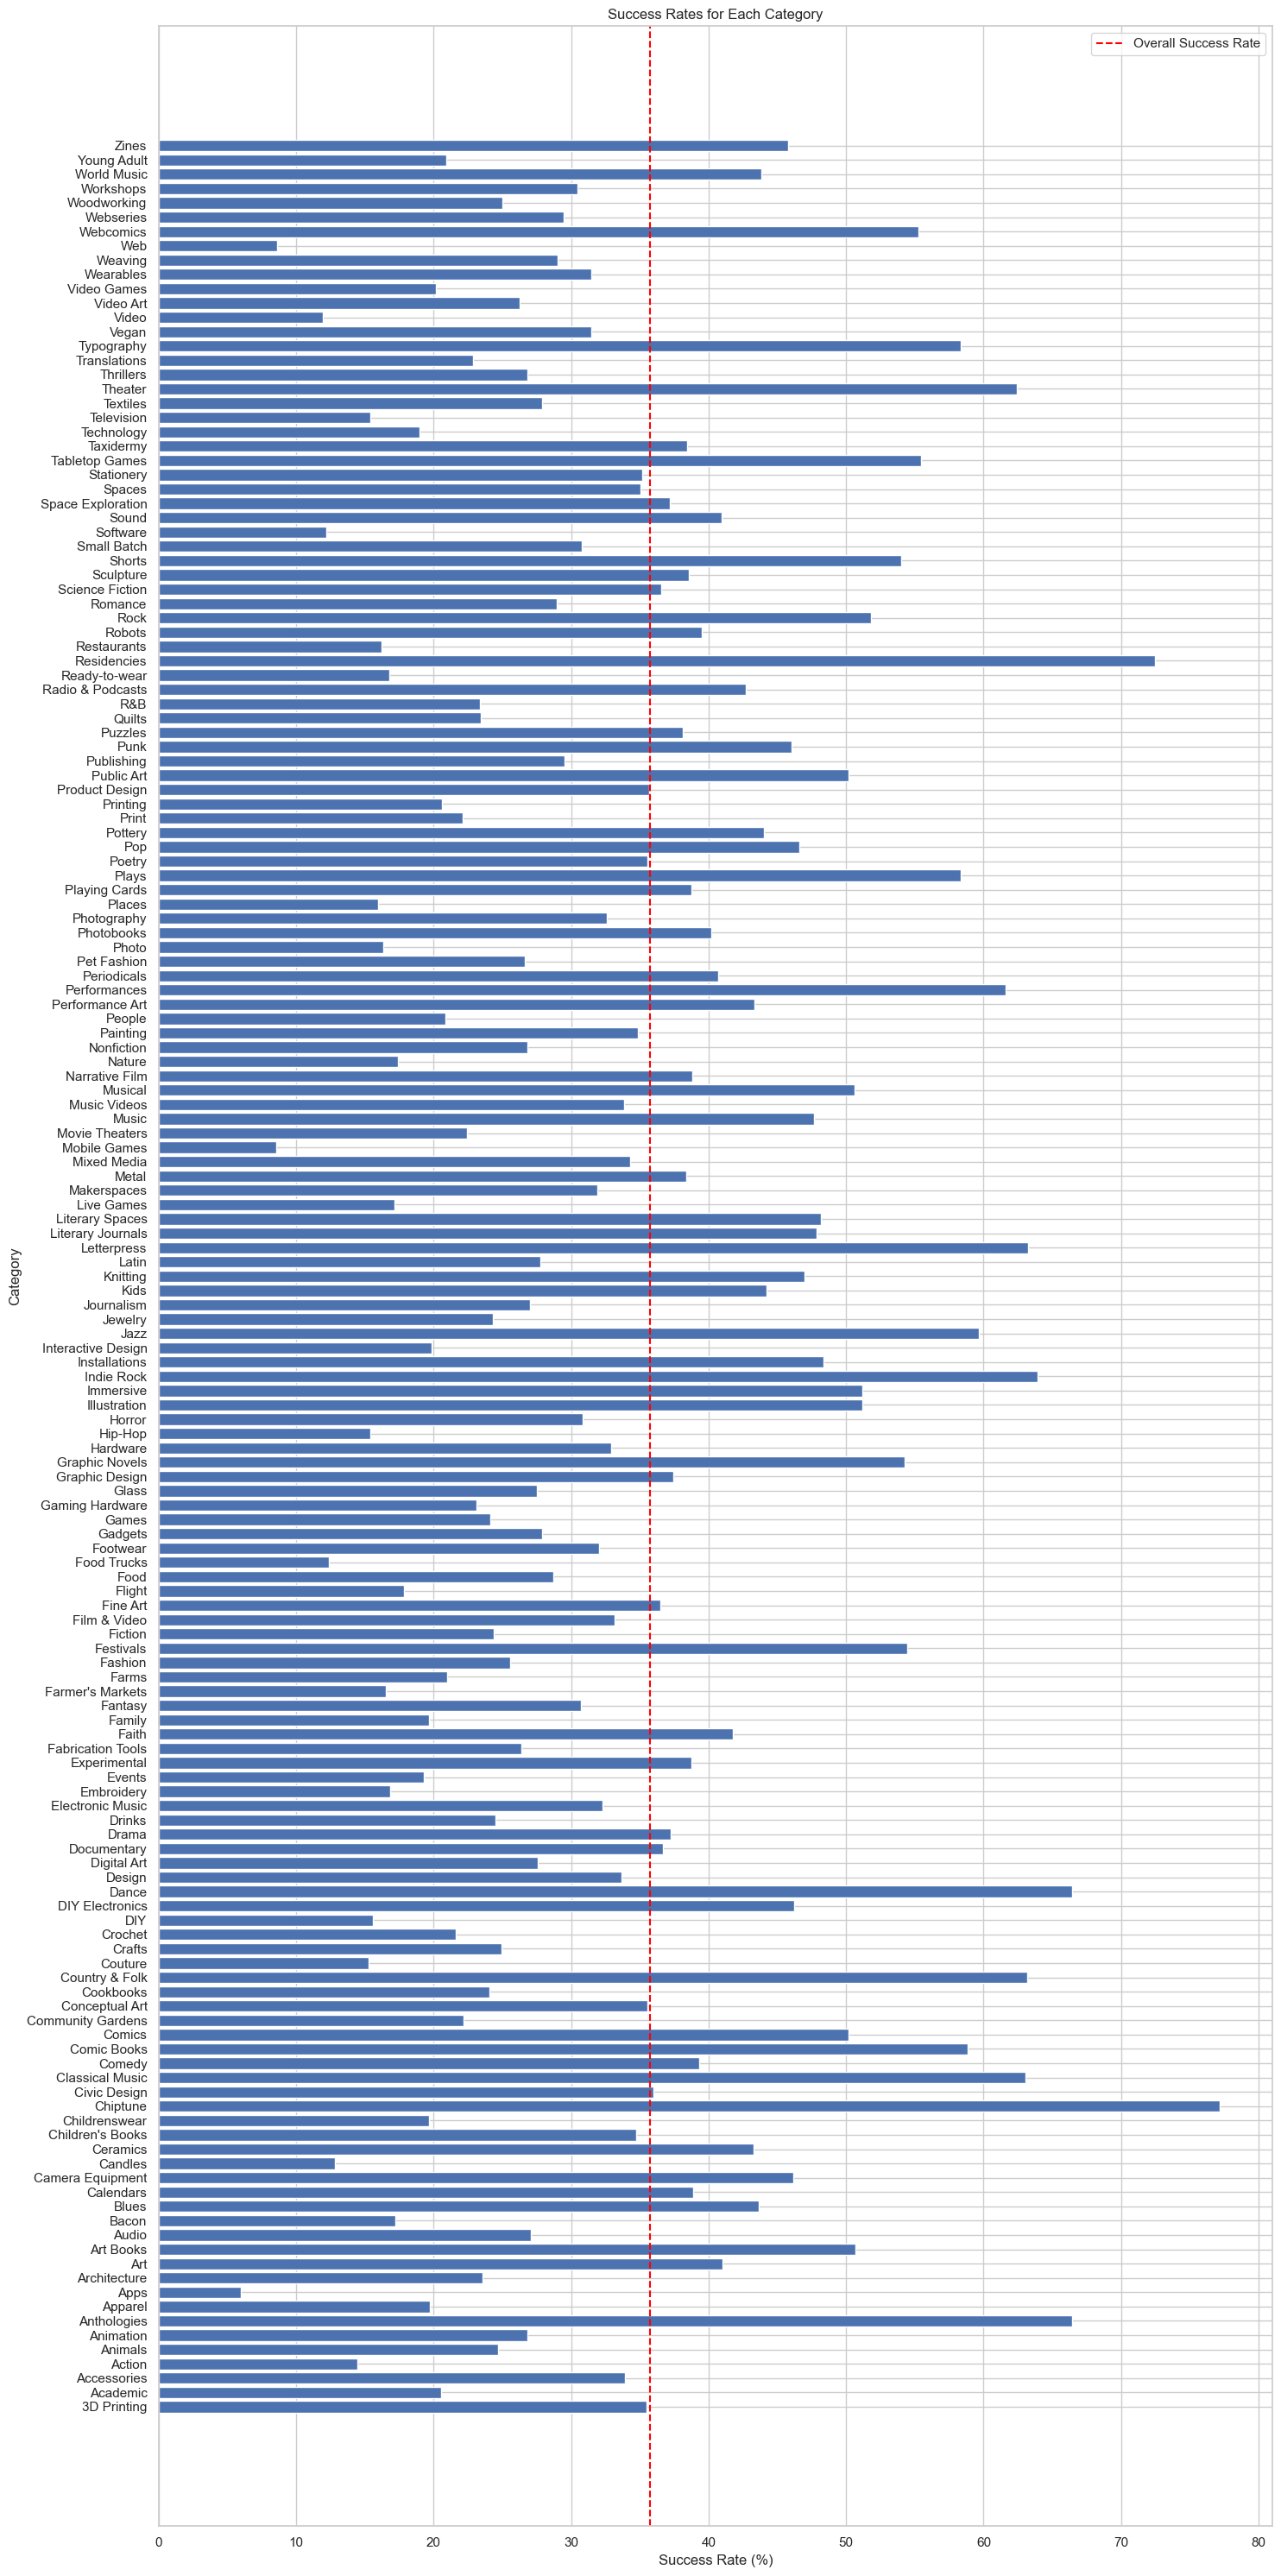

In [64]:
plt.figure(figsize=(15, 30))
plt.barh(success_rate.index, success_rate.values)
plt.axvline(overall_success_rate, color='red', linestyle='--', label='Overall Success Rate')
plt.xlabel('Success Rate (%)')
plt.ylabel('Category')
plt.title('Success Rates for Each Category')
plt.legend()

plt.gca().set_yticklabels(success_rate.index, rotation=0)

plt.tight_layout()
plt.show()